In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("delay_analysis.csv", index_col = 0)

In [43]:
df.head()

train  Dmr  Pasg  Pec  Kugt  Nlkt  Manu  Skap  Jwnr  Absa  Mgkm  Tlmr  \
0  13173  107   NaN  NaN    28   NaN   NaN   NaN   NaN    98   NaN   NaN   
1  13173   88   NaN  NaN    78   NaN   NaN   NaN   NaN    77   NaN   NaN   
2  13173   70   NaN  NaN    66   NaN   NaN   NaN   NaN    49   NaN   NaN   
3  13173   37   NaN  NaN    22   NaN   NaN   NaN   NaN     9   NaN   NaN   
4  13173  130   NaN  NaN   114   NaN   NaN   NaN   NaN   113   NaN   NaN   

   Jrna  Jgnr  Agtl  
0   NaN   NaN    66  
1   NaN   NaN     0  
2   NaN   NaN     0  
3   NaN   NaN   -26  
4   NaN   NaN    80

## Missing Fill

In [44]:
actual = pd.read_csv('dharma.csv')
actual

TRAINID  TRAINNUMBER  SEQNUMBER STTNCODE   BLCKSCTN  WTTARVL  WTTDPRT  \
0         2         5676          1      Dmr   Dmr-Pasg    20400  20400.0   
1         2         5676          2     Pasg   Pasg-Pec    21120  21180.0   
2         2         5676          3      Pec   Pec-Kugt    22140  22200.0   
3         2         5676          4     Kugt  Kugt-Nlkt    23400  23520.0   
4         2         5676          5     Nlkt  Nlkt-Manu    24540  24600.0   
..      ...          ...        ...      ...        ...      ...      ...   
94        7        12098         11     Tlmr  Tlmr-Jrna    78060  78060.0   
95        7        12098         12     Jrna  Jrna-Jgnr    79620  79620.0   
96        7        12098         13     Jgnr  Jgnr-Agtl    80640  80640.0   
97        7        12098         14     Agtl       Agtl    81000      NaN   
98        8         7030          1      Dmr   Dmr-Pasg    85500  85620.0   

    WTTNEXTARVL  WTTDAYOFRUN  RUNTIME  ...  CREWCHNGCODE  LOCOCHANGE  \
0       20520.0            1    120.0  ...           NaN         NaN   
1       22140.0            1   1560.0  ...           NaN         NaN   
2       23400.0            1   1200.0  ...           NaN         NaN   
3       24540.0            1   1020.0  ...           NaN         NaN   
4       25500.0            1    900.0  ...           NaN         NaN   
..          ...          ...      ...  ...           ...         ...   
94      79620.0            1      NaN  ...           NaN         NaN   
95      80640.0            1      NaN  ...           NaN         NaN   
96      81000.0            1      NaN  ...           NaN         NaN   
97          NaN            1      NaN  ...           NaN         NaN   
98      86400.0            1      NaN  ...           NaN         NaN   

    TRTNCODE  GARBG  WATER  STTNLINE  PFDRTN  CLASSFLAG  REPORTINGFLAG  \
0        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
1        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
2        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
3        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
4        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
..       ...    ...    ...       ...     ...        ...            ...   
94       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
95       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
96       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
97       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
98       NaN    NaN    NaN       NaN     NaN        NaN            NaN   

    BLCKSCTNLINE  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
94           NaN  
95           NaN  
96           NaN  
97           NaN  
98           NaN  

[99 rows x 49 columns]

fill via distance linear interpolation

In [45]:
stations = df.columns[1:]
stations

Index(['Dmr', 'Pasg', 'Pec', 'Kugt', 'Nlkt', 'Manu', 'Skap', 'Jwnr', 'Absa',
       'Mgkm', 'Tlmr', 'Jrna', 'Jgnr', 'Agtl'],
      dtype='object')

In [46]:
df[stations] *= 60

In [47]:
df.head()

train   Dmr  Pasg  Pec  Kugt  Nlkt  Manu  Skap  Jwnr  Absa  Mgkm  Tlmr  \
0  13173  6420   NaN  NaN  1680   NaN   NaN   NaN   NaN  5880   NaN   NaN   
1  13173  5280   NaN  NaN  4680   NaN   NaN   NaN   NaN  4620   NaN   NaN   
2  13173  4200   NaN  NaN  3960   NaN   NaN   NaN   NaN  2940   NaN   NaN   
3  13173  2220   NaN  NaN  1320   NaN   NaN   NaN   NaN   540   NaN   NaN   
4  13173  7800   NaN  NaN  6840   NaN   NaN   NaN   NaN  6780   NaN   NaN   

   Jrna  Jgnr  Agtl  
0   NaN   NaN  3960  
1   NaN   NaN     0  
2   NaN   NaN     0  
3   NaN   NaN -1560  
4   NaN   NaN  4800

In [48]:
new_fill_delay = df.copy()

In [49]:

# Iterate over each column in the DataFrame
for column in stations:
    new_column_name = f"{column}_actual"  # New column name
    new_fill_delay[new_column_name] = [np.NaN]*len(new_fill_delay)  # Insert new column


In [50]:
new_fill_delay.head()

train   Dmr  Pasg  Pec  Kugt  Nlkt  Manu  Skap  Jwnr  Absa  ...  \
0  13173  6420   NaN  NaN  1680   NaN   NaN   NaN   NaN  5880  ...   
1  13173  5280   NaN  NaN  4680   NaN   NaN   NaN   NaN  4620  ...   
2  13173  4200   NaN  NaN  3960   NaN   NaN   NaN   NaN  2940  ...   
3  13173  2220   NaN  NaN  1320   NaN   NaN   NaN   NaN   540  ...   
4  13173  7800   NaN  NaN  6840   NaN   NaN   NaN   NaN  6780  ...   

   Nlkt_actual  Manu_actual  Skap_actual  Jwnr_actual  Absa_actual  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Mgkm_actual  Tlmr_actual  Jrna_actual  Jgnr_actual  Agtl_actual  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 29 columns]

In [51]:
trainnos = df.train.unique()

In [52]:
for trainno in trainnos:
  for station in stations:
    if station != 'Agtl':
      # Find the rows where train equals trainno
      mask = new_fill_delay['train'] == trainno
      actual_dep = actual[(actual['TRAINNUMBER'] == trainno) & (actual['STTNCODE'] == station)]['WTTDPRT'].values[0]
      stationstring = station + '_actual'
      # Set the value of stationstring column for the rows where the condition is True
      new_fill_delay.loc[mask, stationstring] = actual_dep
    else:
      # Find the rows where train equals trainno
      mask = new_fill_delay['train'] == trainno
      actual_dep = actual[(actual['TRAINNUMBER'] == trainno) & (actual['STTNCODE'] == station)]['WTTARVL'].values[0]
      stationstring = station + '_actual'
      # Set the value of stationstring column for the rows where the condition is True
      new_fill_delay.loc[mask, stationstring] = actual_dep

In [53]:
new_fill_delay

train   Dmr  Pasg  Pec  Kugt  Nlkt    Manu  Skap  Jwnr  Absa  ...  \
0   13173  6420   NaN  NaN  1680   NaN     NaN   NaN   NaN  5880  ...   
1   13173  5280   NaN  NaN  4680   NaN     NaN   NaN   NaN  4620  ...   
2   13173  4200   NaN  NaN  3960   NaN     NaN   NaN   NaN  2940  ...   
3   13173  2220   NaN  NaN  1320   NaN     NaN   NaN   NaN   540  ...   
4   13173  7800   NaN  NaN  6840   NaN     NaN   NaN   NaN  6780  ...   
..    ...   ...   ...  ...   ...   ...     ...   ...   ...   ...  ...   
85  15664  1200   NaN  NaN  1140   NaN  1140.0   NaN   NaN  1080  ...   
86  15664     0   NaN  NaN     0   NaN  2340.0   NaN   NaN  2280  ...   
87  15664  1800   NaN  NaN   840   NaN   840.0   NaN   NaN   240  ...   
88  15664  2700   NaN  NaN  2700   NaN  2340.0   NaN   NaN  1680  ...   
89  15664     0   NaN  NaN    60   NaN     0.0   NaN   NaN   240  ...   

    Nlkt_actual  Manu_actual  Skap_actual  Jwnr_actual  Absa_actual  \
0       55260.0      56100.0      56340.0      57300.0      57780.0   
1       55260.0      56100.0      56340.0      57300.0      57780.0   
2       55260.0      56100.0      56340.0      57300.0      57780.0   
3       55260.0      56100.0      56340.0      57300.0      57780.0   
4       55260.0      56100.0      56340.0      57300.0      57780.0   
..          ...          ...          ...          ...          ...   
85      49860.0      50760.0      51060.0      52140.0      52680.0   
86      49860.0      50760.0      51060.0      52140.0      52680.0   
87      49860.0      50760.0      51060.0      52140.0      52680.0   
88      49860.0      50760.0      51060.0      52140.0      52680.0   
89      49860.0      50760.0      51060.0      52140.0      52680.0   

    Mgkm_actual  Tlmr_actual  Jrna_actual  Jgnr_actual  Agtl_actual  
0       59580.0      60600.0      62520.0      63780.0      64200.0  
1       59580.0      60600.0      62520.0      63780.0      64200.0  
2       59580.0      60600.0      62520.0      63780.0      64200.0  
3       59580.0      60600.0      62520.0      63780.0      64200.0  
4       59580.0      60600.0      62520.0      63780.0      64200.0  
..          ...          ...          ...          ...          ...  
85      54060.0      54900.0      56040.0      57060.0      57900.0  
86      54060.0      54900.0      56040.0      57060.0      57900.0  
87      54060.0      54900.0      56040.0      57060.0      57900.0  
88      54060.0      54900.0      56040.0      57060.0      57900.0  
89      54060.0      54900.0      56040.0      57060.0      57900.0  

[90 rows x 29 columns]

In [54]:
for station in stations:
  # Find the rows where train equals trainno
  stationstring = station + '_delay'
  new_fill_delay[stationstring] = [np.NaN]*len(new_fill_delay)
new_fill_delay

train   Dmr  Pasg  Pec  Kugt  Nlkt    Manu  Skap  Jwnr  Absa  ...  \
0   13173  6420   NaN  NaN  1680   NaN     NaN   NaN   NaN  5880  ...   
1   13173  5280   NaN  NaN  4680   NaN     NaN   NaN   NaN  4620  ...   
2   13173  4200   NaN  NaN  3960   NaN     NaN   NaN   NaN  2940  ...   
3   13173  2220   NaN  NaN  1320   NaN     NaN   NaN   NaN   540  ...   
4   13173  7800   NaN  NaN  6840   NaN     NaN   NaN   NaN  6780  ...   
..    ...   ...   ...  ...   ...   ...     ...   ...   ...   ...  ...   
85  15664  1200   NaN  NaN  1140   NaN  1140.0   NaN   NaN  1080  ...   
86  15664     0   NaN  NaN     0   NaN  2340.0   NaN   NaN  2280  ...   
87  15664  1800   NaN  NaN   840   NaN   840.0   NaN   NaN   240  ...   
88  15664  2700   NaN  NaN  2700   NaN  2340.0   NaN   NaN  1680  ...   
89  15664     0   NaN  NaN    60   NaN     0.0   NaN   NaN   240  ...   

    Nlkt_delay  Manu_delay  Skap_delay  Jwnr_delay  Absa_delay  Mgkm_delay  \
0          NaN         NaN         NaN         NaN         NaN         NaN   
1          NaN         NaN         NaN         NaN         NaN         NaN   
2          NaN         NaN         NaN         NaN         NaN         NaN   
3          NaN         NaN         NaN         NaN         NaN         NaN   
4          NaN         NaN         NaN         NaN         NaN         NaN   
..         ...         ...         ...         ...         ...         ...   
85         NaN         NaN         NaN         NaN         NaN         NaN   
86         NaN         NaN         NaN         NaN         NaN         NaN   
87         NaN         NaN         NaN         NaN         NaN         NaN   
88         NaN         NaN         NaN         NaN         NaN         NaN   
89         NaN         NaN         NaN         NaN         NaN         NaN   

    Tlmr_delay  Jrna_delay  Jgnr_delay  Agtl_delay  
0          NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN  
..         ...         ...         ...         ...  
85         NaN         NaN         NaN         NaN  
86         NaN         NaN         NaN         NaN  
87         NaN         NaN         NaN         NaN  
88         NaN         NaN         NaN         NaN  
89         NaN         NaN         NaN         NaN  

[90 rows x 43 columns]

In [55]:
for trainno in trainnos:
  for station in stations:
    if station != 'Agtl':
      # Find the rows where train equals trainno
      mask = new_fill_delay['train'] == trainno
      if new_fill_delay.loc[mask, station].notna().sum()>2:
        stationstring = station + '_delay'
        st = station + '_actual'
        new_fill_delay.loc[mask, stationstring] = new_fill_delay.loc[mask, station] + new_fill_delay.loc[mask, st]

    else:
      # Find the rows where train equals trainno
      stationstring = station + '_delay'
      st = station + '_actual'
      new_fill_delay.loc[mask, stationstring] = new_fill_delay.loc[mask, station] + new_fill_delay.loc[mask, st]

In [56]:
new_fill_delay

train   Dmr  Pasg  Pec  Kugt  Nlkt    Manu  Skap  Jwnr  Absa  ...  \
0   13173  6420   NaN  NaN  1680   NaN     NaN   NaN   NaN  5880  ...   
1   13173  5280   NaN  NaN  4680   NaN     NaN   NaN   NaN  4620  ...   
2   13173  4200   NaN  NaN  3960   NaN     NaN   NaN   NaN  2940  ...   
3   13173  2220   NaN  NaN  1320   NaN     NaN   NaN   NaN   540  ...   
4   13173  7800   NaN  NaN  6840   NaN     NaN   NaN   NaN  6780  ...   
..    ...   ...   ...  ...   ...   ...     ...   ...   ...   ...  ...   
85  15664  1200   NaN  NaN  1140   NaN  1140.0   NaN   NaN  1080  ...   
86  15664     0   NaN  NaN     0   NaN  2340.0   NaN   NaN  2280  ...   
87  15664  1800   NaN  NaN   840   NaN   840.0   NaN   NaN   240  ...   
88  15664  2700   NaN  NaN  2700   NaN  2340.0   NaN   NaN  1680  ...   
89  15664     0   NaN  NaN    60   NaN     0.0   NaN   NaN   240  ...   

    Nlkt_delay  Manu_delay  Skap_delay  Jwnr_delay  Absa_delay  Mgkm_delay  \
0          NaN         NaN         NaN         NaN     63660.0         NaN   
1          NaN         NaN         NaN         NaN     62400.0         NaN   
2          NaN         NaN         NaN         NaN     60720.0         NaN   
3          NaN         NaN         NaN         NaN     58320.0         NaN   
4          NaN         NaN         NaN         NaN     64560.0         NaN   
..         ...         ...         ...         ...         ...         ...   
85         NaN     51900.0         NaN         NaN     53760.0         NaN   
86         NaN     53100.0         NaN         NaN     54960.0         NaN   
87         NaN     51600.0         NaN         NaN     52920.0         NaN   
88         NaN     53100.0         NaN         NaN     54360.0         NaN   
89         NaN     50760.0         NaN         NaN     52920.0         NaN   

    Tlmr_delay  Jrna_delay  Jgnr_delay  Agtl_delay  
0          NaN         NaN         NaN     68160.0  
1          NaN         NaN         NaN     64200.0  
2          NaN         NaN         NaN     64200.0  
3          NaN         NaN         NaN     62640.0  
4          NaN         NaN         NaN     69000.0  
..         ...         ...         ...         ...  
85     55980.0     57120.0     58140.0     58800.0  
86     57180.0     58320.0     59340.0     58740.0  
87     55140.0     56520.0     57300.0     58140.0  
88     55920.0     56760.0     57780.0     58200.0  
89     55380.0     56280.0     57240.0     57900.0  

[90 rows x 43 columns]

In [57]:
new_fill_delay.to_csv("output.csv")

## Each station all train

In [ ]:
df.Dmr.describe()

count      90.000000
mean      143.600000
std       207.132471
min         0.000000
25%        15.000000
50%        65.500000
75%       185.500000
max      1312.000000
Name: Dmr, dtype: float64

In [ ]:
sum(df.Dmr.notnull())

90

In [ ]:
stations = df.columns[1:]

In [ ]:
stations

Index(['Dmr', 'Pasg', 'Pec', 'Kugt', 'Nlkt', 'Manu', 'Skap', 'Jwnr', 'Absa',
       'Mgkm', 'Tlmr', 'Jrna', 'Jgnr', 'Agtl'],
      dtype='object')

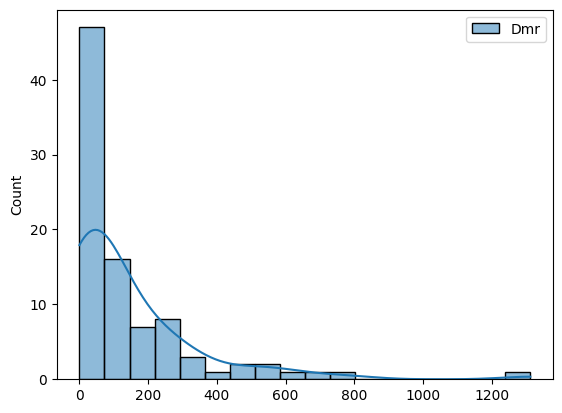

NaN values
NaN values


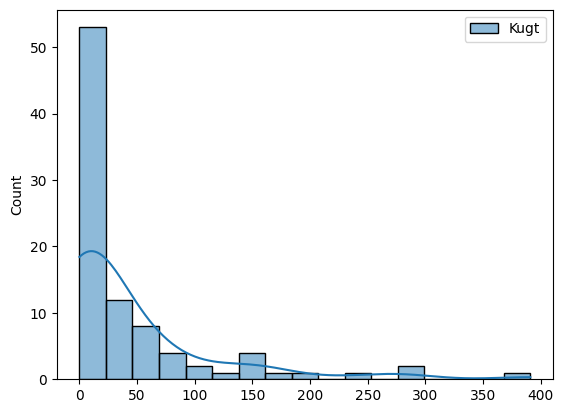

NaN values


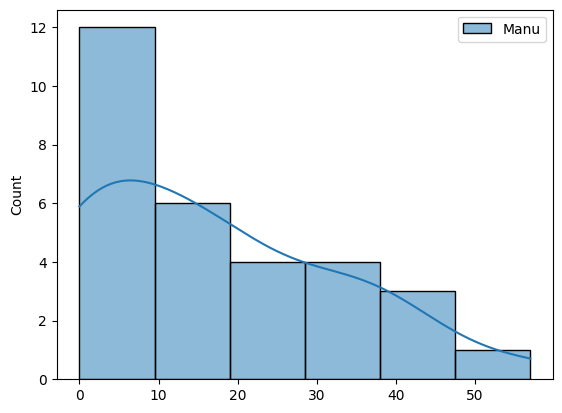

NaN values
NaN values


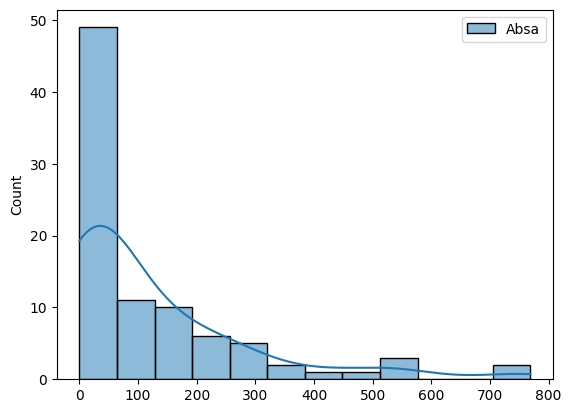

NaN values


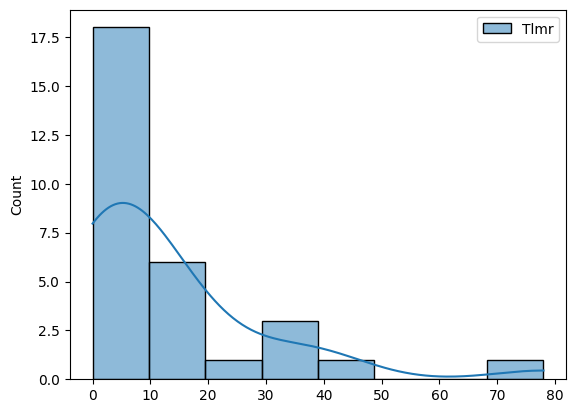

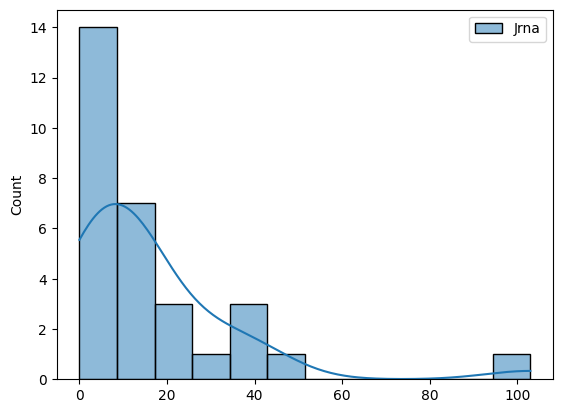

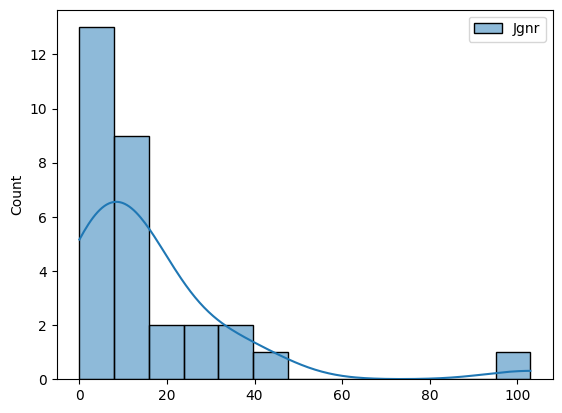

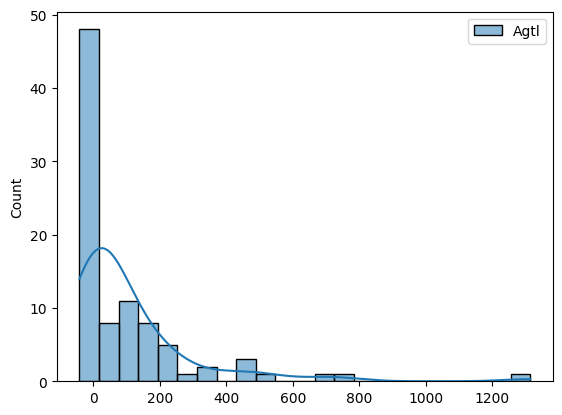

In [ ]:
# Plot histograms for each column
for station in stations:
  try:
    sns.histplot(df[[station]], kde=True)
    plt.show()
  except:
    print("NaN values")


In [ ]:
df.Dmr.describe()

count      90.000000
mean      143.600000
std       207.132471
min         0.000000
25%        15.000000
50%        65.500000
75%       185.500000
max      1312.000000
Name: Dmr, dtype: float64

In [ ]:
df.Dmr

0     107
1      88
2      70
3      37
4     130
     ... 
85     20
86      0
87     30
88     45
89      0
Name: Dmr, Length: 90, dtype: int64

## All station each train

In [ ]:
df_13173 = df[(df.train == 13173)]

In [ ]:
df_13173

train  Dmr  Pasg  Pec  Kugt  Nlkt  Manu  Skap  Jwnr  Absa  Mgkm  Tlmr  \
0   13173  107   NaN  NaN    28   NaN   NaN   NaN   NaN    98   NaN   NaN   
1   13173   88   NaN  NaN    78   NaN   NaN   NaN   NaN    77   NaN   NaN   
2   13173   70   NaN  NaN    66   NaN   NaN   NaN   NaN    49   NaN   NaN   
3   13173   37   NaN  NaN    22   NaN   NaN   NaN   NaN     9   NaN   NaN   
4   13173  130   NaN  NaN   114   NaN   NaN   NaN   NaN   113   NaN   NaN   
5   13173  139   NaN  NaN   146   NaN   NaN   NaN   NaN   146   NaN   NaN   
6   13173  178   NaN  NaN   189   NaN   NaN   NaN   NaN   212   NaN   NaN   
7   13173   64   NaN  NaN    53   NaN   NaN   NaN   NaN    62   NaN   NaN   
8   13173  115   NaN  NaN   114   NaN   NaN   NaN   NaN   113   NaN   NaN   
9   13173  158   NaN  NaN   163   NaN   NaN   NaN   NaN   156   NaN   NaN   
10  13173  374   NaN  NaN   391   NaN   NaN   NaN   NaN   383   NaN   NaN   
11  13173  243   NaN  NaN   244   NaN   NaN   NaN   NaN   237   NaN   NaN   
12  13173  140   NaN  NaN   153   NaN   NaN   NaN   NaN   143   NaN   NaN   
13  13173  271   NaN  NaN   282   NaN   NaN   NaN   NaN   275   NaN   NaN   
14  13173   76   NaN  NaN    81   NaN   NaN   NaN   NaN    80   NaN   NaN   
15  13173   60   NaN  NaN    62   NaN   NaN   NaN   NaN    49   NaN   NaN   
16  13173   58   NaN  NaN    57   NaN   NaN   NaN   NaN    41   NaN   NaN   
17  13173   26   NaN  NaN    32   NaN   NaN   NaN   NaN    20   NaN   NaN   
18  13173  143   NaN  NaN   149   NaN   NaN   NaN   NaN   159   NaN   NaN   
19  13173   76   NaN  NaN   115   NaN   NaN   NaN   NaN    74   NaN   NaN   
20  13173  277   NaN  NaN   278   NaN   NaN   NaN   NaN   267   NaN   NaN   
21  13173   46   NaN  NaN    53   NaN   NaN   NaN   NaN    44   NaN   NaN   
22  13173   47   NaN  NaN    46   NaN   NaN   NaN   NaN    30   NaN   NaN   
23  13173   83   NaN  NaN    82   NaN   NaN   NaN   NaN    42   NaN   NaN   
24  13173  136   NaN  NaN   152   NaN   NaN   NaN   NaN   174   NaN   NaN   
25  13173   67   NaN  NaN    16   NaN   NaN   NaN   NaN     8   NaN   NaN   
26  13173   78   NaN  NaN    76   NaN   NaN   NaN   NaN    75   NaN   NaN   
27  13173   40   NaN  NaN    39   NaN   NaN   NaN   NaN    43   NaN   NaN   
28  13173   24   NaN  NaN    19   NaN   NaN   NaN   NaN     9   NaN   NaN   
29  13173   34   NaN  NaN    21   NaN   NaN   NaN   NaN    29   NaN   NaN   

    Jrna  Jgnr  Agtl  
0    NaN   NaN    66  
1    NaN   NaN     0  
2    NaN   NaN     0  
3    NaN   NaN   -26  
4    NaN   NaN    80  
5    NaN   NaN    97  
6    NaN   NaN   171  
7    NaN   NaN     9  
8    NaN   NaN    67  
9    NaN   NaN    90  
10   NaN   NaN   347  
11   NaN   NaN   195  
12   NaN   NaN   133  
13   NaN   NaN   240  
14   NaN   NaN    51  
15   NaN   NaN    25  
16   NaN   NaN    14  
17   NaN   NaN     0  
18   NaN   NaN   131  
19   NaN   NaN    57  
20   NaN   NaN   250  
21   NaN   NaN    10  
22   NaN   NaN     0  
23   NaN   NaN    14  
24   NaN   NaN   158  
25   NaN   NaN     0  
26   NaN   NaN    10  
27   NaN   NaN    14  
28   NaN   NaN    -9  
29   NaN   NaN   -11

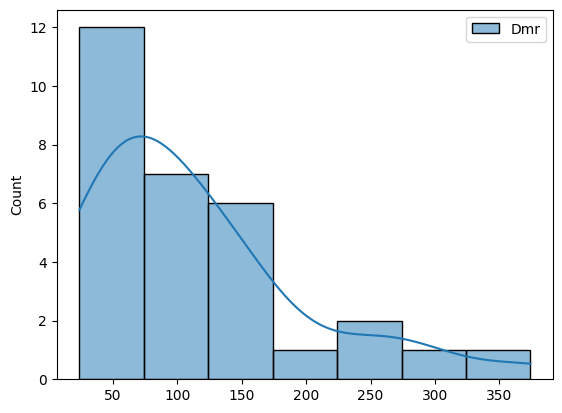

NaN values
NaN values


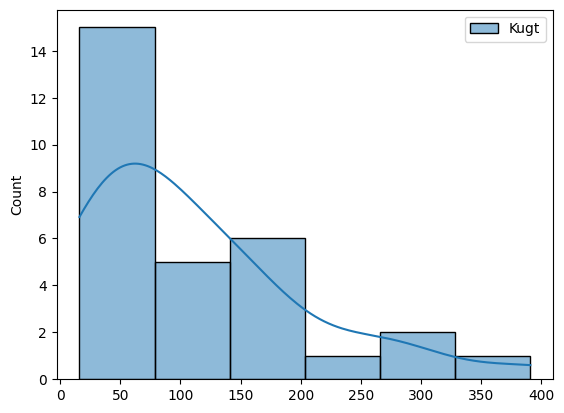

NaN values
NaN values
NaN values
NaN values


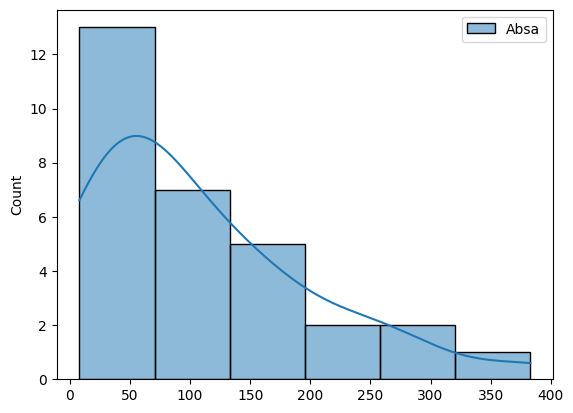

NaN values
NaN values
NaN values
NaN values


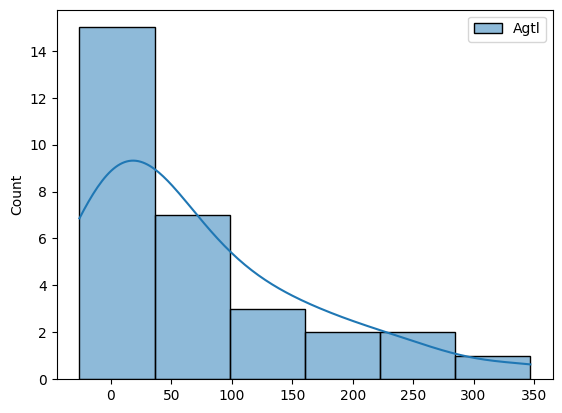

In [ ]:
for station in stations:
  try:
    sns.histplot(df_13173[[station]], kde=True)
    plt.show()
  except:
    print("NaN values")

TRAINID  TRAINNUMBER  SEQNUMBER STTNCODE   BLCKSCTN  WTTARVL  WTTDPRT  \
0         2         5676          1      Dmr   Dmr-Pasg    20400  20400.0   
1         2         5676          2     Pasg   Pasg-Pec    21120  21180.0   
2         2         5676          3      Pec   Pec-Kugt    22140  22200.0   
3         2         5676          4     Kugt  Kugt-Nlkt    23400  23520.0   
4         2         5676          5     Nlkt  Nlkt-Manu    24540  24600.0   
..      ...          ...        ...      ...        ...      ...      ...   
94        7        12098         11     Tlmr  Tlmr-Jrna    78060  78060.0   
95        7        12098         12     Jrna  Jrna-Jgnr    79620  79620.0   
96        7        12098         13     Jgnr  Jgnr-Agtl    80640  80640.0   
97        7        12098         14     Agtl       Agtl    81000      NaN   
98        8         7030          1      Dmr   Dmr-Pasg    85500  85620.0   

    WTTNEXTARVL  WTTDAYOFRUN  RUNTIME  ...  CREWCHNGCODE  LOCOCHANGE  \
0       20520.0            1    120.0  ...           NaN         NaN   
1       22140.0            1   1560.0  ...           NaN         NaN   
2       23400.0            1   1200.0  ...           NaN         NaN   
3       24540.0            1   1020.0  ...           NaN         NaN   
4       25500.0            1    900.0  ...           NaN         NaN   
..          ...          ...      ...  ...           ...         ...   
94      79620.0            1      NaN  ...           NaN         NaN   
95      80640.0            1      NaN  ...           NaN         NaN   
96      81000.0            1      NaN  ...           NaN         NaN   
97          NaN            1      NaN  ...           NaN         NaN   
98      86400.0            1      NaN  ...           NaN         NaN   

    TRTNCODE  GARBG  WATER  STTNLINE  PFDRTN  CLASSFLAG  REPORTINGFLAG  \
0        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
1        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
2        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
3        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
4        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
..       ...    ...    ...       ...     ...        ...            ...   
94       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
95       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
96       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
97       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
98       NaN    NaN    NaN       NaN     NaN        NaN            NaN   

    BLCKSCTNLINE  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
94           NaN  
95           NaN  
96           NaN  
97           NaN  
98           NaN  

[99 rows x 49 columns]

In [ ]:
trainno = 13173
actual_13173 = actual[actual['TRAINNUMBER'] == trainno]

In [ ]:
actual_13173

TRAINID  TRAINNUMBER  SEQNUMBER STTNCODE   BLCKSCTN  WTTARVL  WTTDPRT  \
42        4        13173          1      Dmr   Dmr-Pasg    51660  51960.0   
43        4        13173          2     Pasg   Pasg-Pec    52740  52740.0   
44        4        13173          3      Pec   Pec-Kugt    53580  53580.0   
45        4        13173          4     Kugt  Kugt-Nlkt    54300  54420.0   
46        4        13173          5     Nlkt  Nlkt-Manu    55260  55260.0   
47        4        13173          6     Manu  Manu-Skap    56100  56100.0   
48        4        13173          7     Skap  Skap-Jwnr    56340  56340.0   
49        4        13173          8     Jwnr  Jwnr-Absa    57300  57300.0   
50        4        13173          9     Absa  Absa-Mgkm    57660  57780.0   
51        4        13173         10     Mgkm  Mgkm-Tlmr    59580  59580.0   
52        4        13173         11     Tlmr  Tlmr-Jrna    60600  60600.0   
53        4        13173         12     Jrna  Jrna-Jgnr    62520  62520.0   
54        4        13173         13     Jgnr  Jgnr-Agtl    63780  63780.0   
55        4        13173         14     Agtl       Agtl    64200      NaN   

    WTTNEXTARVL  WTTDAYOFRUN  RUNTIME  ...  CREWCHNGCODE  LOCOCHANGE  \
42      52740.0            1      NaN  ...           NaN         NaN   
43      53580.0            1      NaN  ...           NaN         NaN   
44      54300.0            1      NaN  ...           NaN         NaN   
45      55260.0            1      NaN  ...           NaN         NaN   
46      56100.0            1      NaN  ...           NaN         NaN   
47      56340.0            1      NaN  ...           NaN         NaN   
48      57300.0            1      NaN  ...           NaN         NaN   
49      57660.0            1      NaN  ...           NaN         NaN   
50      59580.0            1      NaN  ...           NaN         NaN   
51      60600.0            1      NaN  ...           NaN         NaN   
52      62520.0            1      NaN  ...           NaN         NaN   
53      63780.0            1      NaN  ...           NaN         NaN   
54      64200.0            1      NaN  ...           NaN         NaN   
55          NaN            1      NaN  ...           NaN         NaN   

    TRTNCODE  GARBG  WATER  STTNLINE  PFDRTN  CLASSFLAG  REPORTINGFLAG  \
42       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
43       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
44       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
45       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
46       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
47       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
48       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
49       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
50       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
51       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
52       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
53       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
54       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
55       NaN    NaN    NaN       NaN     NaN        NaN            NaN   

    BLCKSCTNLINE  
42           NaN  
43           NaN  
44           NaN  
45           NaN  
46           NaN  
47           NaN  
48           NaN  
49           NaN  
50           NaN  
51           NaN  
52           NaN  
53           NaN  
54           NaN  
55           NaN  

[14 rows x 49 columns]

In [ ]:
actual_dep_13173 = actual_13173['WTTDPRT']

In [ ]:
actual_dep_13173 = actual_dep_13173[:-1]
actual_dep_13173 = actual_dep_13173/60

In [ ]:
actual_dep_13173

42     866.0
43     879.0
44     893.0
45     907.0
46     921.0
47     935.0
48     939.0
49     955.0
50     963.0
51     993.0
52    1010.0
53    1042.0
54    1063.0
Name: WTTDPRT, dtype: float64

In [ ]:
print(df_13173[['Dmr']])

    Dmr
0   107
1    88
2    70
3    37
4   130
5   139
6   178
7    64
8   115
9   158
10  374
11  243
12  140
13  271
14   76
15   60
16   58
17   26
18  143
19   76
20  277
21   46
22   47
23   83
24  136
25   67
26   78
27   40
28   24
29   34


In [ ]:
import numpy as np

# Function to calculate confidence interval using bootstrapping
def bootstrap_ci_small_sample(data, n_bootstrap=30, alpha=0.05):
    # Initialize array to store bootstrap samples
    bootstrap_samples = np.empty(n_bootstrap)

    # Resample with replacement and calculate statistic (e.g., mean, median, etc.)
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_samples[i] = np.mean(bootstrap_sample)  # Change to desired statistic

    # Calculate confidence interval
    sorted_bootstrap_samples = np.sort(bootstrap_samples)
    lower_index = int(n_bootstrap * alpha / 2)
    upper_index = int(n_bootstrap * (1 - alpha / 2))
    lower_bound = sorted_bootstrap_samples[lower_index]
    upper_bound = sorted_bootstrap_samples[upper_index]

    return lower_bound, upper_bound

# Example usage:
# Assuming 'data' is your list of data
data = df_13173['Dmr'].tolist()
lower_bound, upper_bound = bootstrap_ci_small_sample(data)
print("95% Confidence Interval:", (lower_bound, upper_bound))


95% Confidence Interval: (92.96666666666667, 159.56666666666666)


In [ ]:
df_13173[['Dmr']].describe()

Dmr
count   30.000000
mean   112.833333
std     84.212819
min     24.000000
25%     58.500000
50%     80.500000
75%    139.750000
max    374.000000